# Introduction

- In the field of dentistry, the early detection and diagnosis of dental caries (commonly known as cavities) play a crucial role in preserving oral health and preventing more severe dental issues. With the advancements in machine learning and computer vision, it is now possible to leverage these technologies to develop automated systems that aid in the identification and classification of caries in oral images.

- In this project, we aim to build a machine learning model for the detection of caries in oral images. We will employ techniques such as data augmentation and regularization to enhance the model's generalization. By utilizing a dataset containing labeled images of oral scans, we will train and evaluate the model's performance in accurately classifying images as either showing signs of caries or being caries-free.

In [11]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 5.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/10.6 MB 6.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/10.6 MB 11.6 MB/s eta 0:00:01
   ---------- ----------------------------- 2.7/10.6 MB 14.1 MB/s eta 0:00:01
   ------------- -------------------------- 3.6/10.6 MB 16.3 MB/s eta 0:00:01
   ----------------- ---------------------- 4.6/10.6 MB 16.3 MB/s eta 0:00:01
   ------------------ --------------------- 4.8/10.6 MB 14.5 MB/s eta 0:00:01
   ------------------ --------------------- 4.8/10.6 MB 14.5 MB/s eta 0:00:01
   ---------------------- ----------------- 5.9/10.6 MB 13.9 MB/s eta 0:00:01
   -------------------------- ------------- 7.1/10.6 MB 15.1 MB/s eta 0:00:01


In [1]:
pip install gradio==3.50

   ---------------------------------------- 0.0/20.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/20.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/20.3 MB 640.0 kB/s eta 0:00:32
   ---------------------------------------- 0.1/20.3 MB 653.6 kB/s eta 0:00:31
   ---------------------------------------- 0.1/20.3 MB 1.1 MB/s eta 0:00:19
    --------------------------------------- 0.3/20.3 MB 1.5 MB/s eta 0:00:13
   - -------------------------------------- 0.8/20.3 MB 3.2 MB/s eta 0:00:07
   ---- ----------------------------------- 2.2/20.3 MB 7.4 MB/s eta 0:00:03
   ----- ---------------------------------- 2.9/20.3 MB 9.2 MB/s eta 0:00:02
   ------- -------------------------------- 3.8/20.3 MB 10.2 MB/s eta 0:00:02
   --------- ------------------------------ 4.6/20.3 MB 10.5 MB/s eta 0:00:02
   --------- ------------------------------ 4.7/20.3 MB 10.1 MB/s eta 0:00:02
   ----------- ---------------------------- 5.8/20.3 MB 11.2 MB/s eta 0:00:02
   --

In [1]:
# Import necessary libraries
import gradio as gr
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
import warnings
from sklearn.exceptions import UndefinedMetricWarning

In [2]:
train_dir = r'C:\Users\Rayyan\Downloads\Caries-Spectra A dataset of Enamel Caries\Caries-Spectra A dataset of Enamel Caries\Caries_Dataset\trianing'
test_dir = r'C:\Users\Rayyan\Downloads\Caries-Spectra A dataset of Enamel Caries\Caries-Spectra A dataset of Enamel Caries\Caries_Dataset\test'

# Exploratory Data Analysis (EDA)

In [3]:
# Count the number of images in each class
train_caries_count = len(os.listdir(os.path.join(train_dir, 'caries')))
train_no_caries_count = len(os.listdir(os.path.join(train_dir, 'without_caries')))
test_caries_count = len(os.listdir(os.path.join(test_dir, 'caries')))
test_no_caries_count = len(os.listdir(os.path.join(test_dir, 'no-caries')))

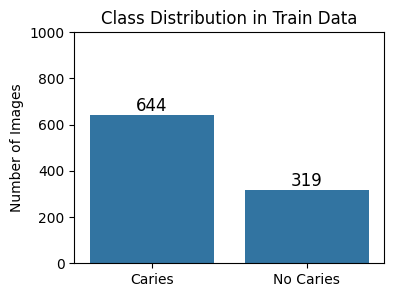

In [4]:
# Create a bar plot to visualize class distribution
plt.figure(figsize=(4, 3))
sns.barplot(x=['Caries', 'No Caries'], y=[train_caries_count, train_no_caries_count])
plt.title('Class Distribution in Train Data')
plt.ylabel('Number of Images')
plt.ylim(0, 1000)

# Add data labels to the bars
for i, count in enumerate([train_caries_count, train_no_caries_count]):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

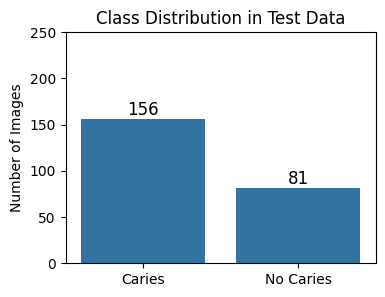

In [5]:
# Create a bar plot to visualize class distribution
plt.figure(figsize=(4, 3))
sns.barplot(x=['Caries', 'No Caries'], y=[test_caries_count, test_no_caries_count])
plt.title('Class Distribution in Test Data')
plt.ylabel('Number of Images')
plt.ylim(0, 250)

# Add data labels to the bars
for i, count in enumerate([test_caries_count, test_no_caries_count]):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

### Histograms of Pixel Intensities

(array([ 414634.,   89278.,   83080.,   95474.,  112612.,  135581.,
         170753.,  210524.,  247317.,  275464.,  370237.,  357915.,
         465378.,  536902.,  524936.,  501648.,  508005.,  524462.,
         564446.,  612853.,  843564.,  750717.,  782474.,  795698.,
         818604.,  885570.,  931006.,  961171., 1038749., 1145994.,
        1505233., 1453934., 1584932., 1634860., 1544531., 1547217.,
        1498148., 1490841., 1436890., 1525848., 2022995., 1786530.,
        1989826., 2080995., 1747755., 1260559., 1243815., 1580799.,
        1617754., 1709924.]),
 array([  0.        ,   5.0999999 ,  10.19999981,  15.30000019,
         20.39999962,  25.5       ,  30.60000038,  35.70000076,
         40.79999924,  45.90000153,  51.        ,  56.09999847,
         61.20000076,  66.30000305,  71.40000153,  76.5       ,
         81.59999847,  86.69999695,  91.80000305,  96.90000153,
        102.        , 107.09999847, 112.19999695, 117.30000305,
        122.40000153, 127.5       , 132.60

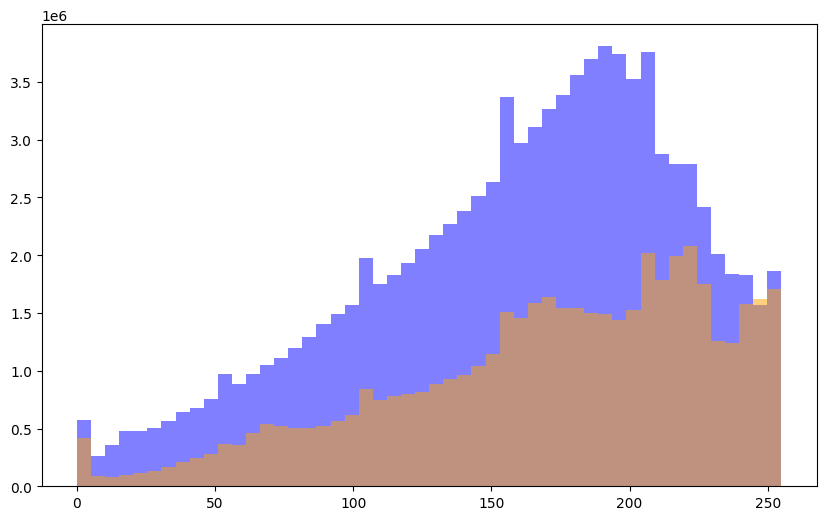

In [6]:
# Define the target image size
target_size = (224, 224)

# Load caries images as a NumPy array
caries_image_paths = [os.path.join(train_dir, 'caries', filename) for filename in os.listdir(os.path.join(train_dir, 'caries'))]
caries_images = []
for img_path in caries_image_paths:
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    caries_images.append(img_array)
caries_images = np.array(caries_images)

# Load no caries images as a NumPy array
no_caries_image_paths = [os.path.join(train_dir, 'without_caries', filename) for filename in os.listdir(os.path.join(train_dir, 'without_caries'))]
no_caries_images = []
for img_path in no_caries_image_paths:
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    no_caries_images.append(img_array)
no_caries_images = np.array(no_caries_images)

# Plot histograms of pixel intensities
plt.figure(figsize=(10, 6))
plt.hist(caries_images.flatten(), bins=50, color='blue', alpha=0.5, label='Caries')
plt.hist(no_caries_images.flatten(), bins=50, color='orange', alpha=0.5, label='No Caries')

## Displaying Sample Images from Each Class

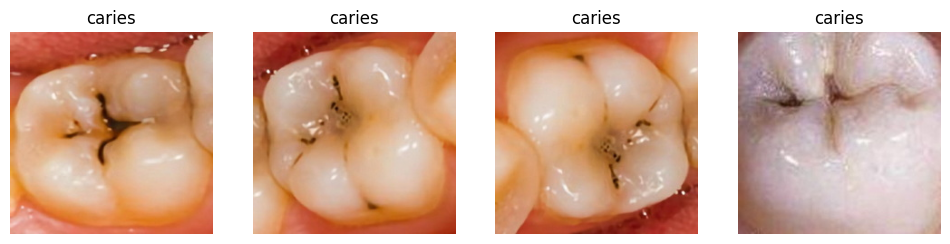

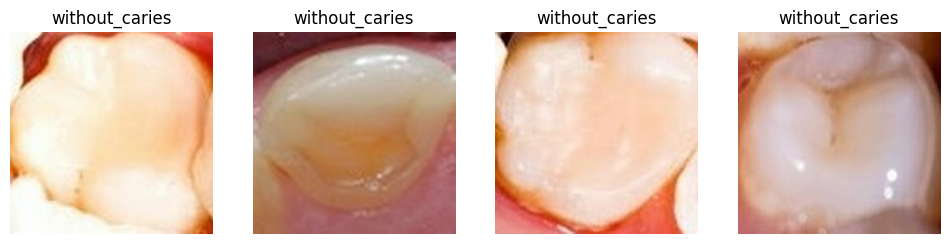

In [7]:
def display_samples(class_name, directory):
    plt.figure(figsize=(12, 6))
    for i in range(4):
        image_path = os.path.join(directory, class_name, os.listdir(os.path.join(directory, class_name))[i])
        img = Image.open(image_path)
        plt.subplot(1, 4, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

display_samples('caries', train_dir)
display_samples('without_caries', train_dir)

# Data Augmentation

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 963 images belonging to 2 classes.
Found 237 images belonging to 2 classes.


## Displaying Some Augmented Images

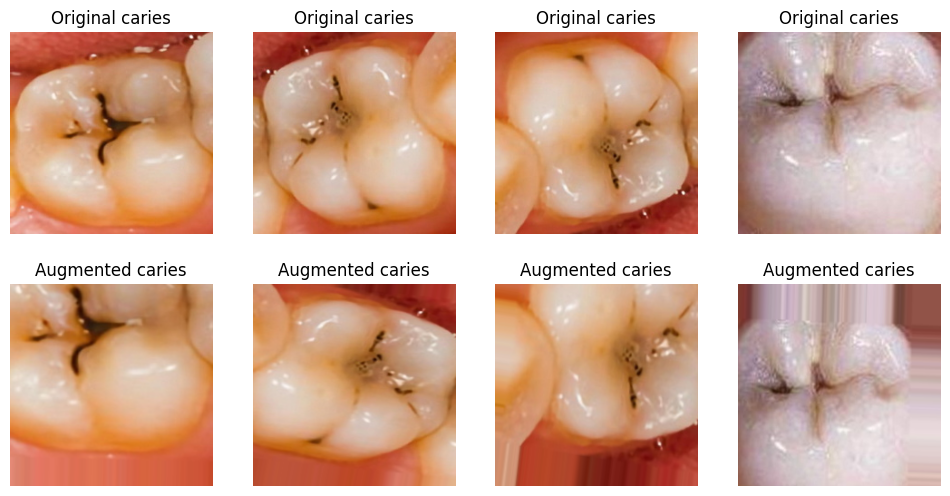

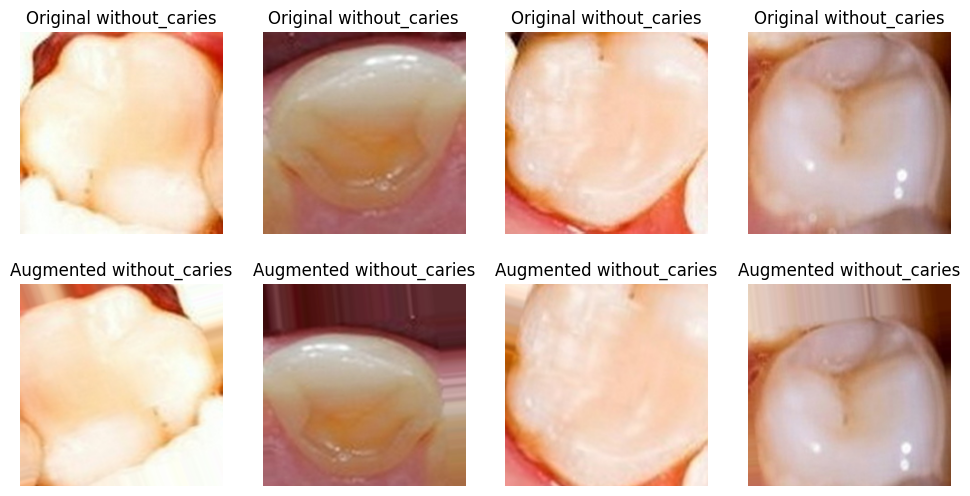

In [9]:
def display_augmented_images(class_name, directory, generator):
    plt.figure(figsize=(12, 6))
    for i in range(4):
        original_image_path = os.path.join(directory, class_name, os.listdir(os.path.join(directory, class_name))[i])
        original_img = Image.open(original_image_path)

        # Convert PIL Image to NumPy array
        original_array = np.array(original_img)

        # Apply random transformation to the NumPy array
        augmented_array = generator.random_transform(original_array)

        augmented_img = Image.fromarray(augmented_array)

        plt.subplot(2, 4, i + 1)
        plt.imshow(original_img)
        plt.title(f'Original {class_name}')
        plt.axis('off')

        plt.subplot(2, 4, i + 5)
        plt.imshow(augmented_img)
        plt.title(f'Augmented {class_name}')
        plt.axis('off')

    plt.show()

# Display augmented images for 'caries' class
display_augmented_images('caries', train_dir, train_datagen)

# Display augmented images for 'no_caries' class
display_augmented_images('without_caries', train_dir, train_datagen)

Found 963 images belonging to 2 classes.
Found 237 images belonging to 2 classes.


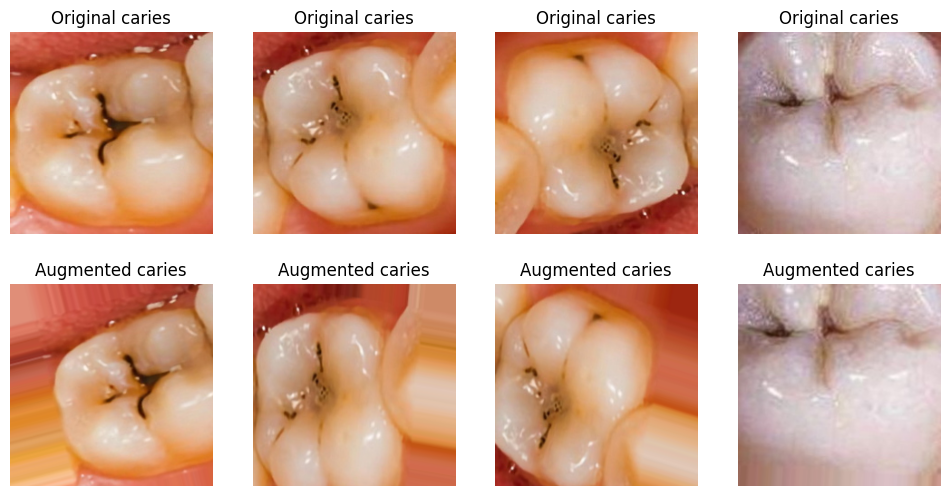

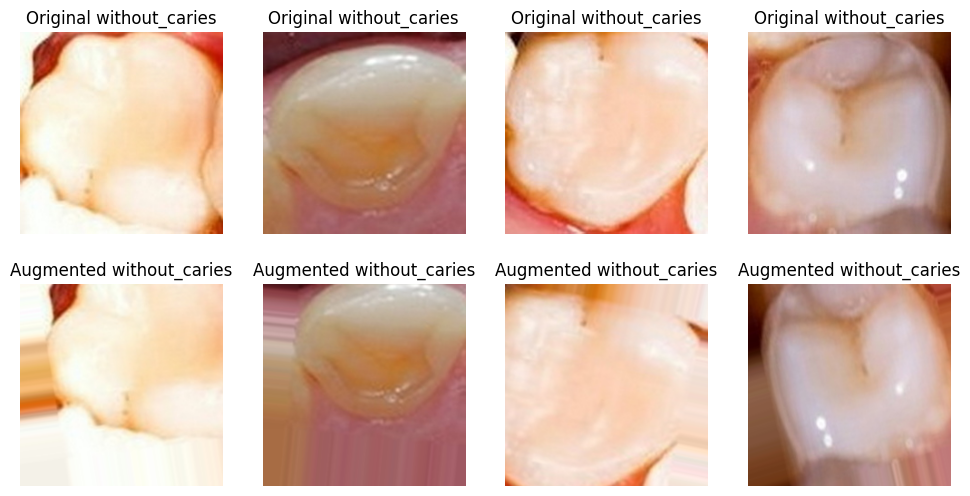

In [10]:
#-----------------------------modification-to-inc-no_caries_acc-------------------------------------------
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def display_augmented_images(class_name, directory, generator):
    plt.figure(figsize=(12, 6))
    class_dir = os.path.join(directory, class_name)
    images = os.listdir(class_dir)
    for i in range(4):
        original_image_path = os.path.join(class_dir, images[i])
        original_img = Image.open(original_image_path)

        # Convert PIL Image to NumPy array
        original_array = np.array(original_img)

        # Apply random transformation to the NumPy array
        augmented_array = generator.random_transform(original_array)

        augmented_img = Image.fromarray(augmented_array)

        plt.subplot(2, 4, i + 1)
        plt.imshow(original_img)
        plt.title(f'Original {class_name}')
        plt.axis('off')

        plt.subplot(2, 4, i + 5)
        plt.imshow(augmented_img)
        plt.title(f'Augmented {class_name}')
        plt.axis('off')

    plt.show()

# Directory containing training data
train_dir = r'C:\Users\Rayyan\Downloads\Caries-Spectra A dataset of Enamel Caries\Caries-Spectra A dataset of Enamel Caries\Caries_Dataset\trianing'
test_dir = r'C:\Users\Rayyan\Downloads\Caries-Spectra A dataset of Enamel Caries\Caries-Spectra A dataset of Enamel Caries\Caries_Dataset\test'
# Define ImageDataGenerator for augmentation and testing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Define generators for training and testing data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Assuming you are resizing images to (224, 224)
    batch_size=32,
    class_mode='binary'  # Assuming binary classification (carries and no_carries)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Display augmented images for 'caries' class
display_augmented_images('caries', train_dir, train_datagen)

# Display augmented images for 'no_caries' class
display_augmented_images('without_caries', train_dir, train_datagen)


## Modeling

In [11]:
#--------------------------------------updated MobileNet-------------------------------------------
#To update the code to include fine-tuning and regularization, made the following modifications:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# Step 1: Load MobileNet Model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 2: Add Custom Classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)  # Adding L2 regularization
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)

# Step 3: Combine MobileNet with Custom Classifier
model = Model(inputs=base_model.input, outputs=predictions)

# Step 4: Fine-tune some layers of MobileNet
for layer in base_model.layers[:100]:  # Fine-tuning the top 100 layers
    layer.trainable = True

# Step 5: Compile the Model with custom loss function
def custom_loss(y_true, y_pred):
    # Binary cross-entropy loss with L2 regularization
    return tf.keras.losses.binary_crossentropy(y_true, y_pred) + tf.reduce_sum(model.losses)

model.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])

# Print model summary
model.summary()

# Step 6: Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,  # Increase the number of epochs for fine-tuning
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Step 7: Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,360,193 (12.82 MB)

 Trainable params: 3,338,305 (12.73 MB)

 Non-trainable params: 21,888 (85.50 KB)

Epoch 1/20


C:\Users\Rayyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - accuracy: 0.8205 - loss: 4.5445 - val_accuracy: 0.9283 - val_loss: 2.9868
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20


C:\Users\Rayyan\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


31/31 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.9893 - loss: 2.5102 - val_accuracy: 0.8270 - val_loss: 2.1463
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.9856 - loss: 1.4303 - val_accuracy: 0.7173 - val_loss: 1.5390
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.9557 - loss: 0.9689 - val_accuracy: 0.4810 - val_loss: 2.9352
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.9653 - loss: 0.6136 - val_accuracy: 0.9367 - val_loss: 0.4828
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - los

In [ ]:
#-----------------------------------------------------updated MobileNet2---------------------------------------------
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# Define the custom loss function
def custom_loss(y_true, y_pred):
    # Binary cross-entropy loss with L2 regularization
    return tf.keras.losses.binary_crossentropy(y_true, y_pred) + tf.reduce_sum(model.losses)

# Step 1: Load MobileNet Model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 2: Add Custom Classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)  # Adding L2 regularization
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)

# Step 3: Combine MobileNet with Custom Classifier
model = Model(inputs=base_model.input, outputs=predictions)

# Step 4: Fine-tune some layers of MobileNet
for layer in base_model.layers[:100]:  # Fine-tuning the top 100 layers
    layer.trainable = True

# Step 5: Compile the Model with custom loss function
model.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])

# Print model summary
model.summary()

# Step 6: Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # Increase the number of epochs for fine-tuning
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Step 7: Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


In [14]:
# Model evaluation
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test accuracy: {test_acc:.2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 547ms/step - accuracy: 0.9653 - loss: 0.6581
Test accuracy: 0.96


In [15]:
# Generate predictions
predictions = model.predict(test_generator)
y_pred = np.round(predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 612ms/step


In [16]:
# Save the trained model
# Save the trained model in the native Keras format
model.save("trained_model.keras")

In [17]:
# Define the custom loss function
def custom_loss(y_true, y_pred):
    # Binary cross-entropy loss with L2 regularization
    return tf.keras.losses.binary_crossentropy(y_true, y_pred) + tf.reduce_sum(model.losses)

# Load the trained model for inference
model = tf.keras.models.load_model("trained_model.keras", custom_objects={'custom_loss': custom_loss})

## Predicting Some Images

In [21]:
import gradio as gr
import tensorflow as tf
import numpy as np

def custom_loss(y_true, y_pred):
    # Binary cross-entropy loss with L2 regularization
    return tf.keras.losses.binary_crossentropy(y_true, y_pred) + tf.reduce_sum(model.losses)

# Load the trained model for inference
model = tf.keras.models.load_model("trained_model.keras", custom_objects={'custom_loss': custom_loss})


# Define a function to preprocess the image and predict the label
def predict_image(image):
    # Preprocess the image to match the input shape required by the model
    img_array = image.astype(np.float32) / 255.0  # Normalize pixel values to [0, 1]
    img_array = tf.image.resize(img_array, (224, 224))  # Resize the image to (224, 224)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict the label for the input image
    prediction = model.predict(img_array)
    
    # Convert the prediction to label
    if prediction > 0.5:
        label = "no_caries"
    else:
        label = "caries"

    return label

# Define Gradio inputs and outputs
inputs = gr.inputs.Image(shape=(224, 224))
output = gr.outputs.Label()

# Create Gradio interface
gr.Interface(fn=predict_image, inputs=inputs, outputs=output, capture_session=True).launch(share=True)


C:\Users\Rayyan\AppData\Local\Temp\ipykernel_22800\396365405.py:32: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs = gr.inputs.Image(shape=(224, 224))
C:\Users\Rayyan\AppData\Local\Temp\ipykernel_22800\396365405.py:32: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs = gr.inputs.Image(shape=(224, 224))
C:\Users\Rayyan\AppData\Local\Temp\ipykernel_22800\396365405.py:33: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  output = gr.outputs.Label()
C:\Users\Rayyan\AppData\Local\Temp\ipykernel_22800\396365405.py:33: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  output = gr.outputs.Label()
C:\Users\Rayyan\AppData\Local\Temp\ipykernel_22800\396365405.py:36: Gradi

Running on local URL:  http://127.0.0.1:7863
IMPORTANT: You are using gradio version 3.50.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://230db91daaff2d4d36.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


ReadTimeout: HTTPSConnectionPool(host='230db91daaff2d4d36.gradio.live', port=443): Read timed out. (read timeout=3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


C:\Users\Rayyan\AppData\Local\Temp\ipykernel_22800\806781262.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"True: {class_names[int(true_labels[i])]}, Predicted: {class_names[int(predicted_labels[i])]}")


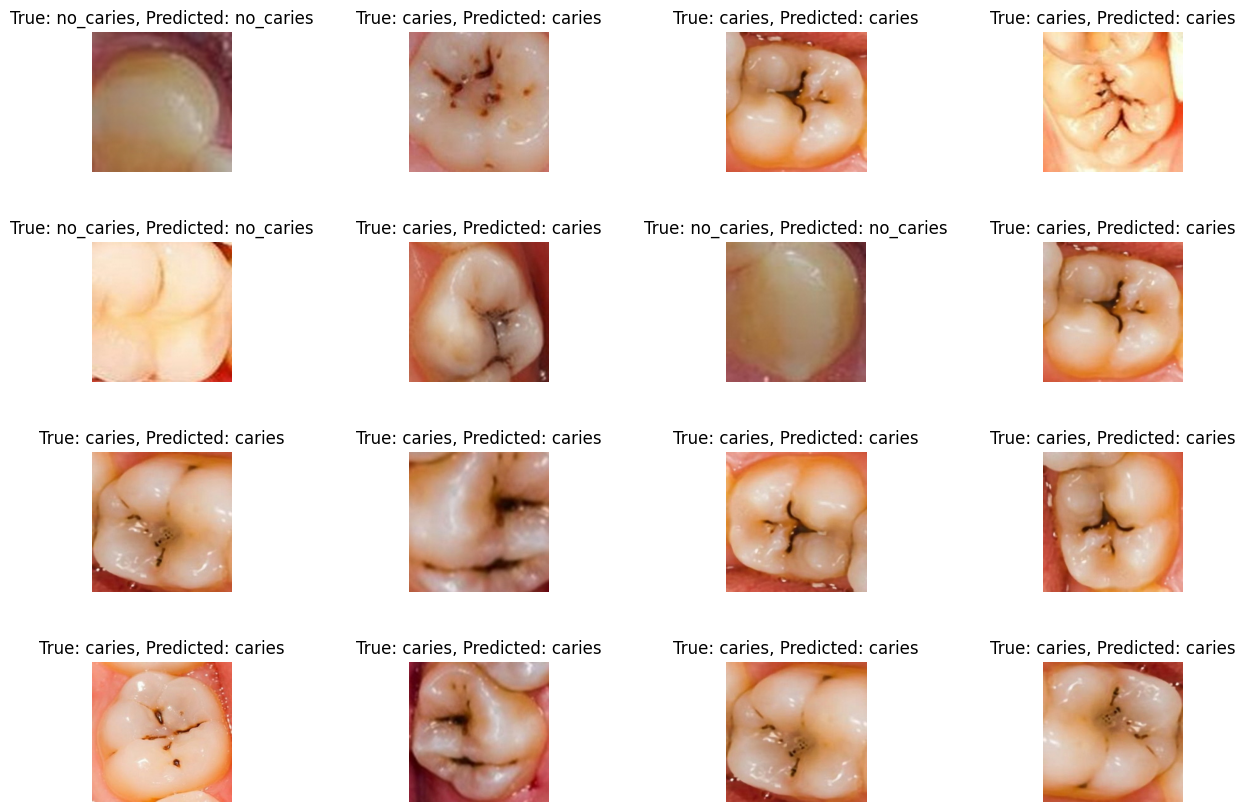

In [20]:
# Load a few test images and predict their labels
num_images_to_predict = 16  # Change this to the number of images you want to predict

# Get a few test images and their true labels
test_images, true_labels = next(test_generator)

# Predict labels for the test images
predicted_labels = model.predict(test_images)

# Convert predicted labels to binary (0 or 1)
predicted_labels = np.round(predicted_labels)

# Define class names
class_names = ['caries', 'no_caries']

# Define the number of rows and columns for subplots
num_rows = 4
num_cols = (num_images_to_predict + num_rows - 1) // num_rows

# Display the test images along with their predicted labels
plt.figure(figsize=(15, 10))
for i in range(num_images_to_predict):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"True: {class_names[int(true_labels[i])]}, Predicted: {class_names[int(predicted_labels[i])]}")
    plt.axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust the spacing between subplots
plt.show()

In [ ]:
#----------------------------------------------- MobileNet----------------------------------------------
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Step 1: Load MobileNet Model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 2: Add Custom Classifier
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)

# Step 3: Combine MobileNet with Custom Classifier
model = Model(inputs=base_model.input, outputs=predictions)

# Step 4: Freeze MobileNet Layers
for layer in base_model.layers:
    layer.trainable = False

# Step 5: Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Step 6: Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Step 7: Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


#Original 
# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

In [ ]:
#------------------------------------------ResNet50-------------------------------------------------------
from tensorflow.keras.applications import ResNet50

# Using ResNet-50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create your custom classifier
flatten_layer = Flatten()(base_model.output)
dense_layer = Dense(128, activation='relu')(flatten_layer)
dropout_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

# Combine the base model with your custom classifier
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Conclusion

- The successful development of an automated caries detection system holds immense potential for improving dental healthcare practices. Through the implementation of a convolutional neural network and the application of data augmentation and regularization techniques, we have demonstrated the ability to effectively classify oral images and identify the presence of dental caries. Our model achieved impressive accuracy in distinguishing between caries and non-caries images, showcasing the power of machine learning in healthcare.



